In [1]:
import numpy as np
import matplotlib.pyplot as plt

dirnamehw3 = 'C:\\Users\\miro2306\\Documents\\ASTR5830\\homework3'
dirnamehw2 = 'C:\\Users\\miro2306\\Documents\\ASTR5830\\homework2'
dirnamehw1 = 'C:\\Users\\miro2306\\Documents\\ASTR5830\\homework1'

# Add the directory to the path so we can import the r-t modules
import sys
sys.path.append(dirnamehw3)

Comparing dust extinction properties...

Comparing dust scale heights...

Comparing dust scattering properties...


c:\Users\miro2306\Documents\ASTR5830\homework3\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


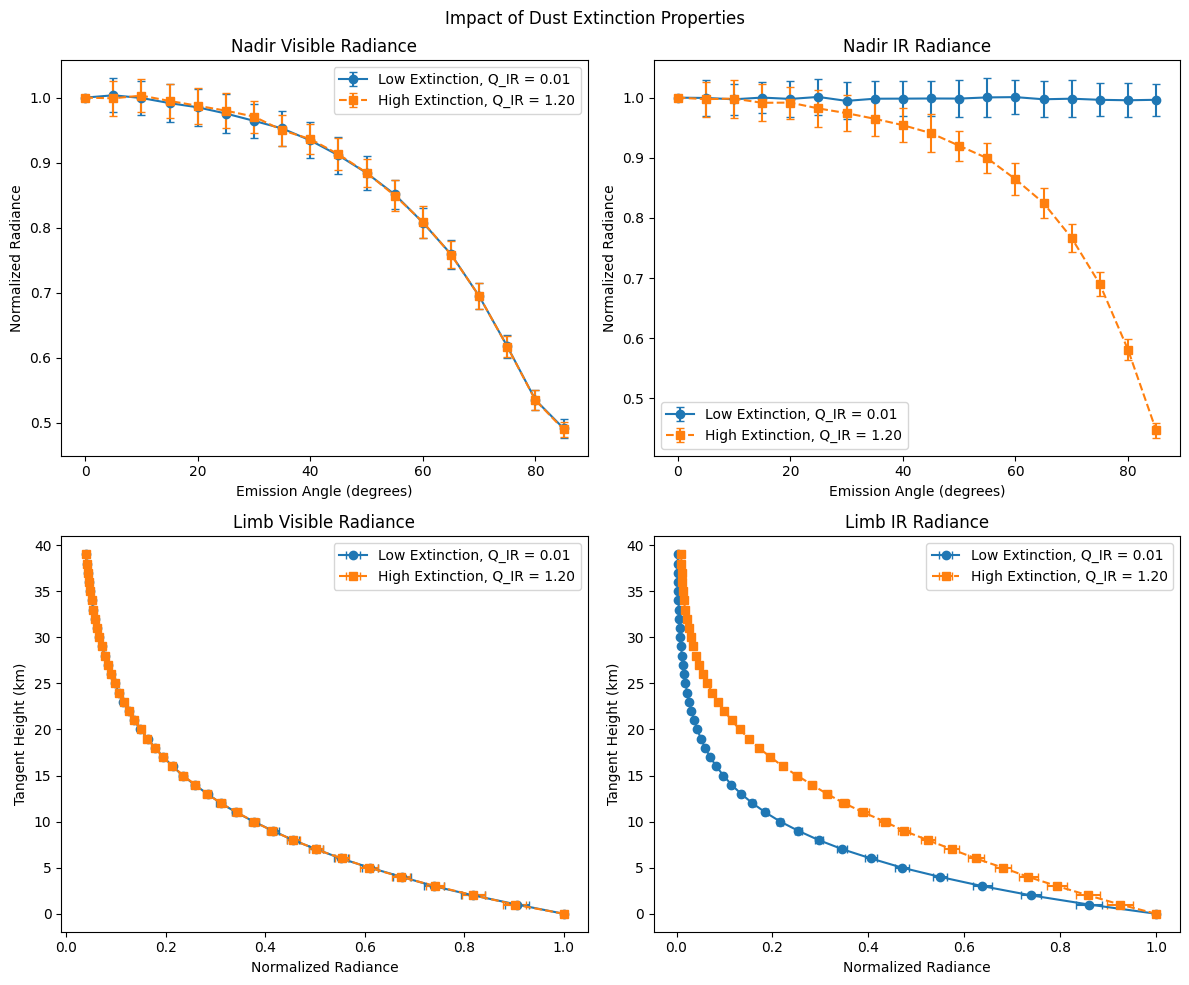

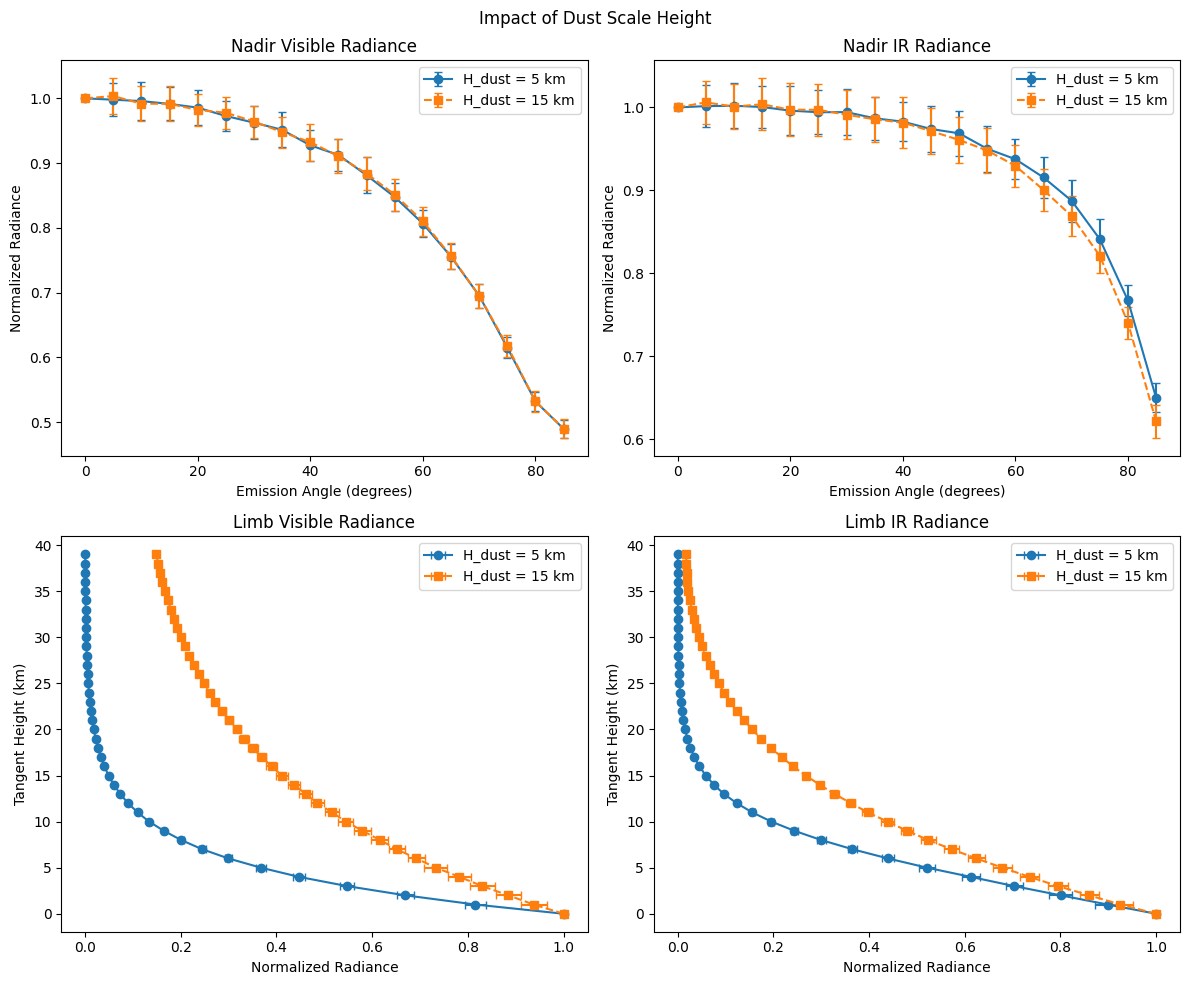

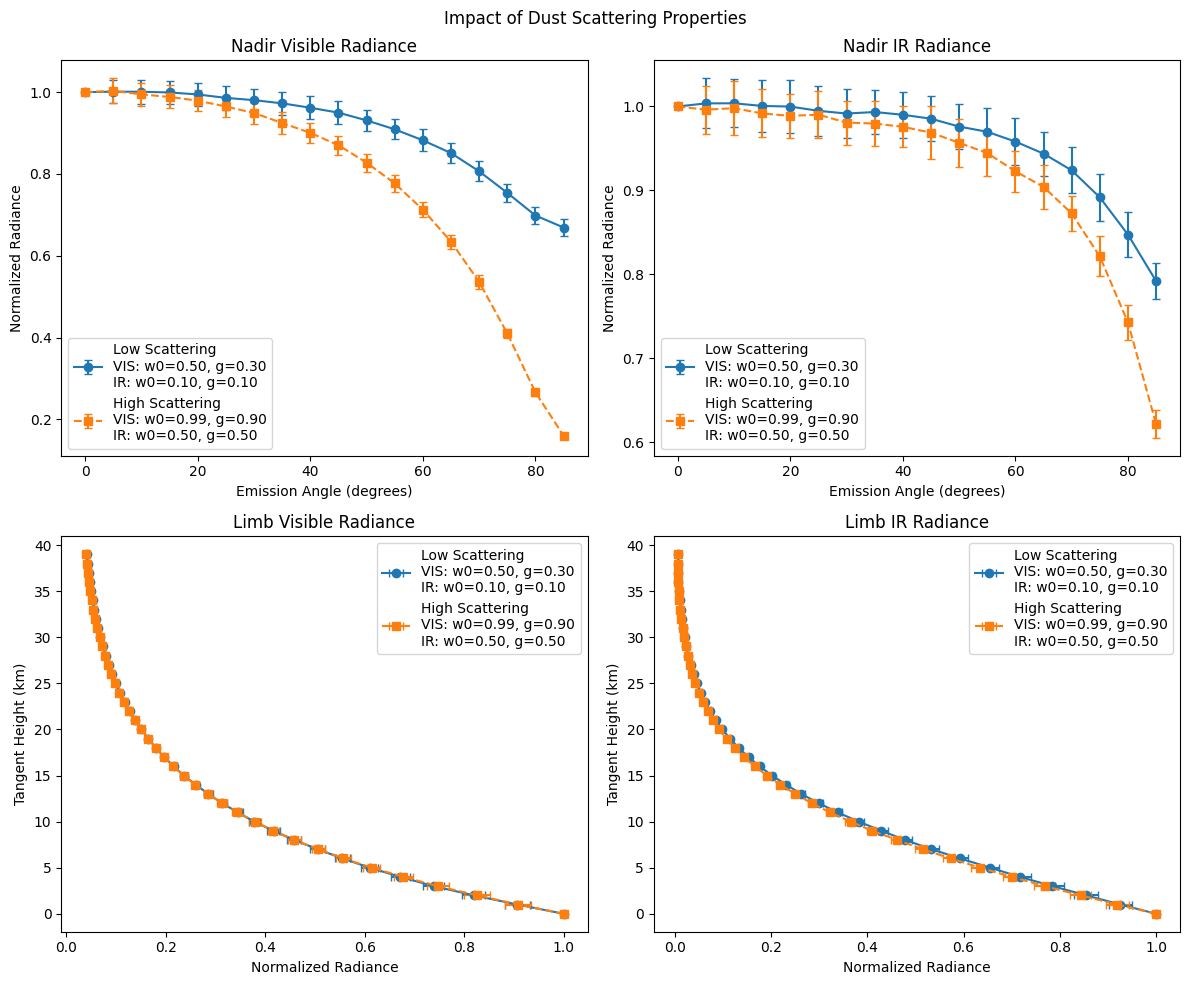

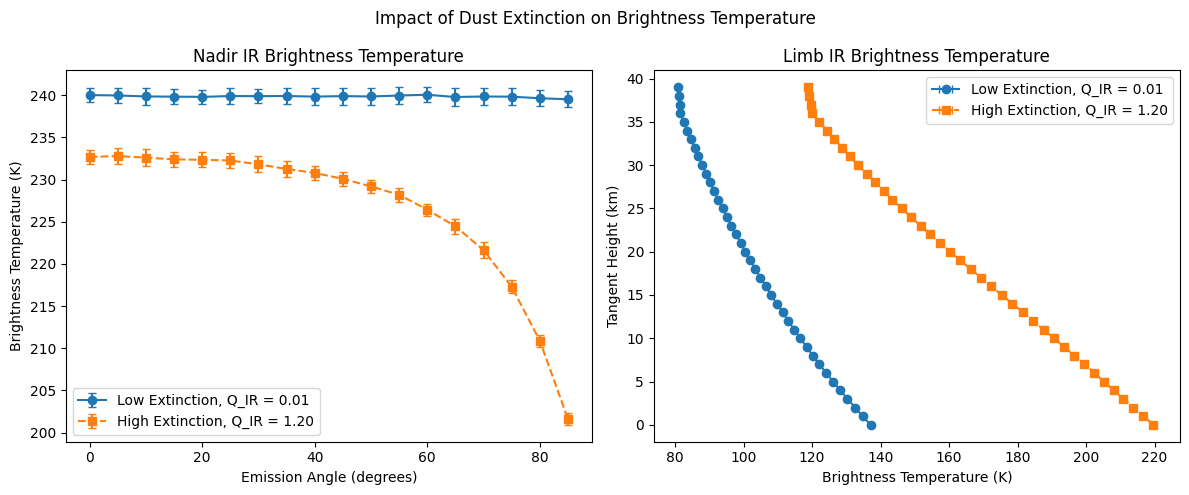

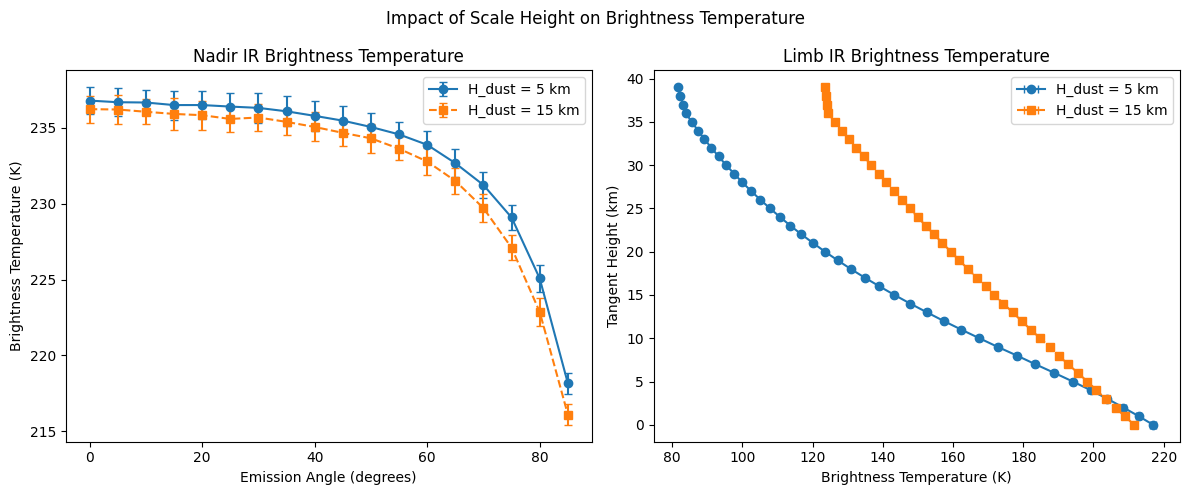

In [2]:
"""
Mars Atmosphere Parameter Sensitivity Study
----------------------------------------
Explores how different dust and atmospheric parameters affect remote sensing observations.

Uses the MarsSyntheticData class to generate synthetic observations of Mars with different
dust properties.
"""

import numpy as np
import matplotlib.pyplot as plt

# Import our modules
from mars_synthetic_data import (MarsSyntheticData, plot_comparison, plot_brightness_temps)

# Parameter sensitivity studies
try:
    # 1. Impact of dust extinction properties
    print("Comparing dust extinction properties...")
    Q_ext_ir_LOW = 0.01
    Q_ext_ir_HIGH = 1.2
    mars_obs_low_ext = MarsSyntheticData(Q_ext_vis=2.0, Q_ext_ir=Q_ext_ir_LOW)
    mars_obs_high_ext = MarsSyntheticData(Q_ext_vis=2.0, Q_ext_ir=Q_ext_ir_HIGH)

    fig1 = plot_comparison(mars_obs_low_ext, mars_obs_high_ext,
                          'Low Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_LOW), 
                          'High Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_HIGH),
                          'Impact of Dust Extinction Properties')

    # 2. Impact of dust scale height
    print("\nComparing dust scale heights...")
    H_dust_LOW = 5e3  # 5 km scale height
    H_dust_HIGH = 15e3  # 15 km scale height
    mars_obs_low_h = MarsSyntheticData(H_dust=H_dust_LOW)
    mars_obs_high_h = MarsSyntheticData(H_dust=H_dust_HIGH)

    fig2 = plot_comparison(mars_obs_low_h, mars_obs_high_h,
                          'H_dust = {} km'.format(int(H_dust_LOW/1e3)), 
                          'H_dust = {} km'.format(int(H_dust_HIGH/1e3)),
                          'Impact of Dust Scale Height')

    # 3. Impact of dust scattering properties
    print("\nComparing dust scattering properties...")
    # Define scattering parameters for both visible and IR
    w0_vis_LOW = 0.5
    w0_vis_HIGH = 0.99
    w0_ir_LOW = 0.1
    w0_ir_HIGH = 0.5
    g_vis_LOW = 0.3
    g_vis_HIGH = 0.9
    g_ir_LOW = 0.1
    g_ir_HIGH = 0.5

    mars_obs_low_scat = MarsSyntheticData(
        single_scatter_albedo_vis=w0_vis_LOW,
        single_scatter_albedo_ir=w0_ir_LOW,
        asymmetry_parameter_vis=g_vis_LOW,
        asymmetry_parameter_ir=g_ir_LOW
    )
    
    mars_obs_high_scat = MarsSyntheticData(
        single_scatter_albedo_vis=w0_vis_HIGH,
        single_scatter_albedo_ir=w0_ir_HIGH,
        asymmetry_parameter_vis=g_vis_HIGH,
        asymmetry_parameter_ir=g_ir_HIGH
    )

    fig3 = plot_comparison(
        mars_obs_low_scat, mars_obs_high_scat,
        'Low Scattering\nVIS: w0={:.2f}, g={:.2f}\nIR: w0={:.2f}, g={:.2f}'.format(
            w0_vis_LOW, g_vis_LOW, w0_ir_LOW, g_ir_LOW), 
        'High Scattering\nVIS: w0={:.2f}, g={:.2f}\nIR: w0={:.2f}, g={:.2f}'.format(
            w0_vis_HIGH, g_vis_HIGH, w0_ir_HIGH, g_ir_HIGH),
        'Impact of Dust Scattering Properties'
    )

    # Plot brightness temperature comparisons
    fig4 = plot_brightness_temps(mars_obs_low_ext, mars_obs_high_ext,
                               'Low Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_LOW),
                               'High Extinction, Q_IR = {:.2f}'.format(Q_ext_ir_HIGH),
                               'Impact of Dust Extinction on Brightness Temperature')

    fig5 = plot_brightness_temps(mars_obs_low_h, mars_obs_high_h,
                               'H_dust = {} km'.format(int(H_dust_LOW/1e3)),
                               'H_dust = {} km'.format(int(H_dust_HIGH/1e3)),
                               'Impact of Scale Height on Brightness Temperature')

    plt.show()

except Exception as e:
    print(f"Error in parameter study: {str(e)}")
    raise

c:\Users\miro2306\Documents\ASTR5830\homework3\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


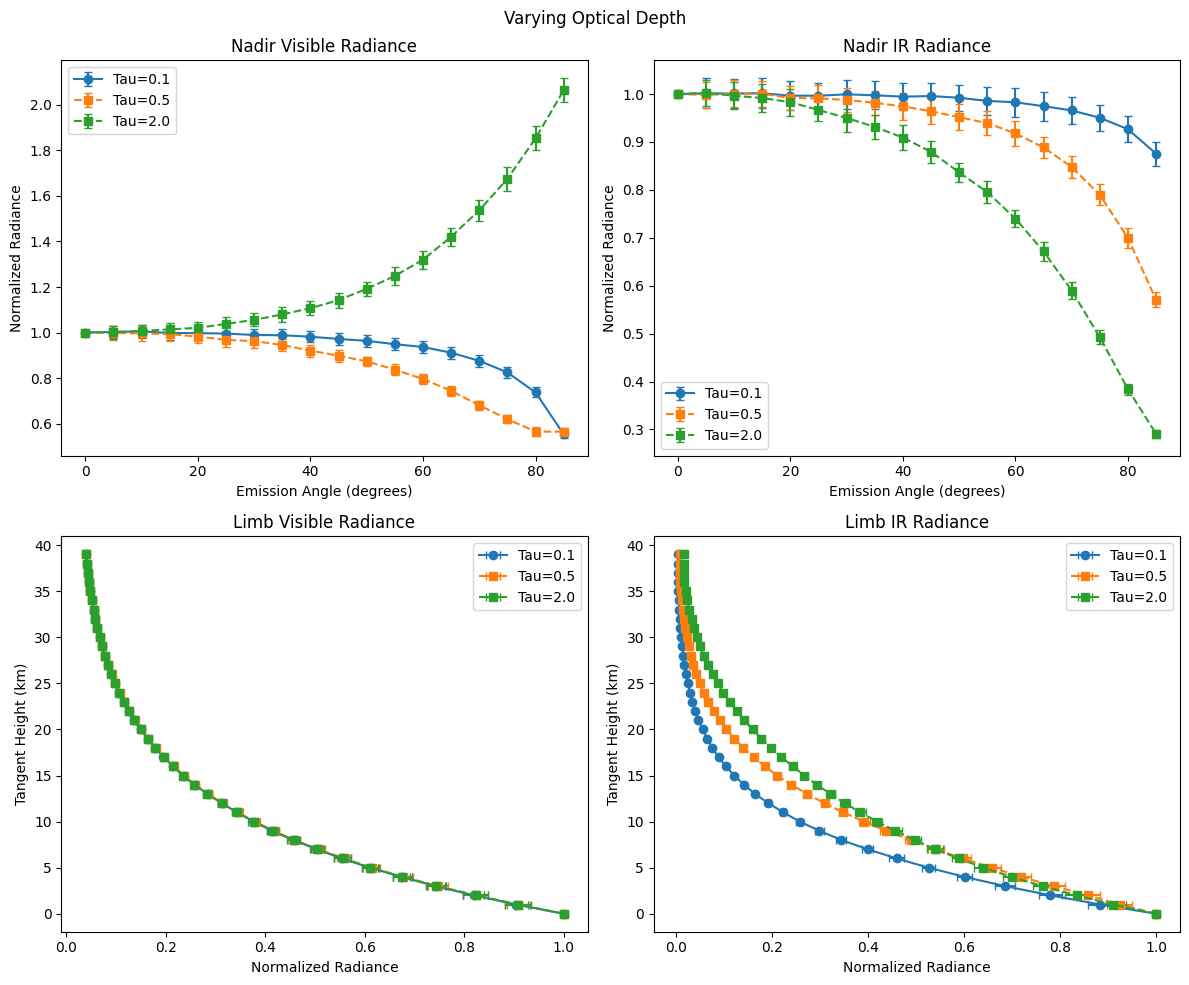

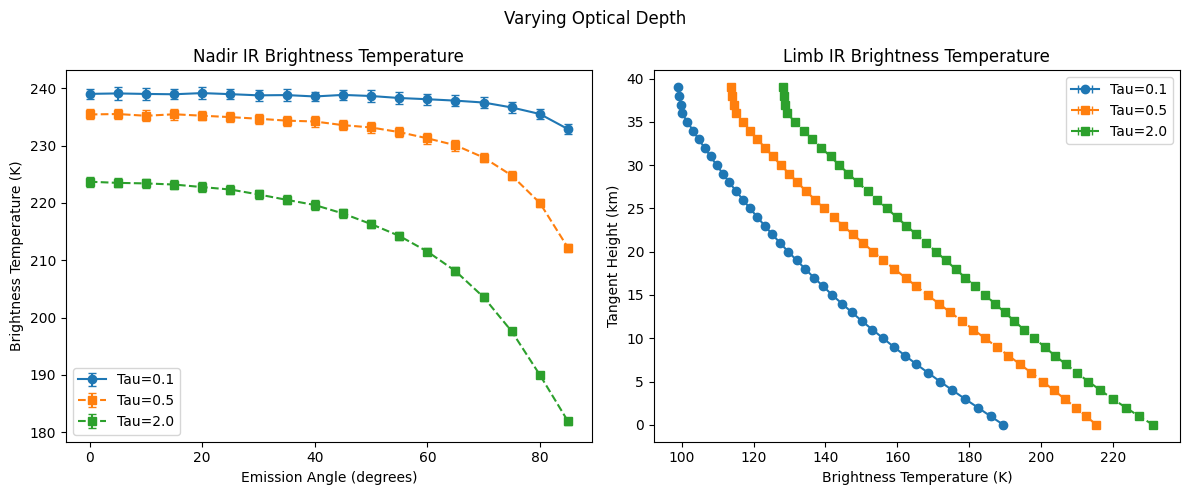

In [1]:
#comparison plots for the optical depth
import mars_synthetic_data as msd
mars_obs = msd.MarsSyntheticData()

tau1=0.1
tau2=0.5
tau3=2.0
tau_comp_plot1 = msd.plot_comparison_optical_depth(obs1=mars_obs, obs2=mars_obs, obs3=mars_obs,
                                              tau1=tau1, tau2=tau2, tau3=tau3,
                                              label1=f"Tau={tau1}",
                                              label2=f"Tau={tau2}",
                                              label3=f"Tau={tau3}",
                                              title="Varying Optical Depth")

tau_comp_plot2 = msd.plot_brightness_temps_optical_depth(obs1=mars_obs, obs2=mars_obs, obs3=mars_obs,
                                                        tau1=tau1, tau2=tau2, tau3=tau3,
                                                        label1=f"Tau={tau1}",
                                                        label2=f"Tau={tau2}",
                                                        label3=f"Tau={tau3}",
                                                        title="Varying Optical Depth")

c:\Users\miro2306\Documents\ASTR5830\homework3\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


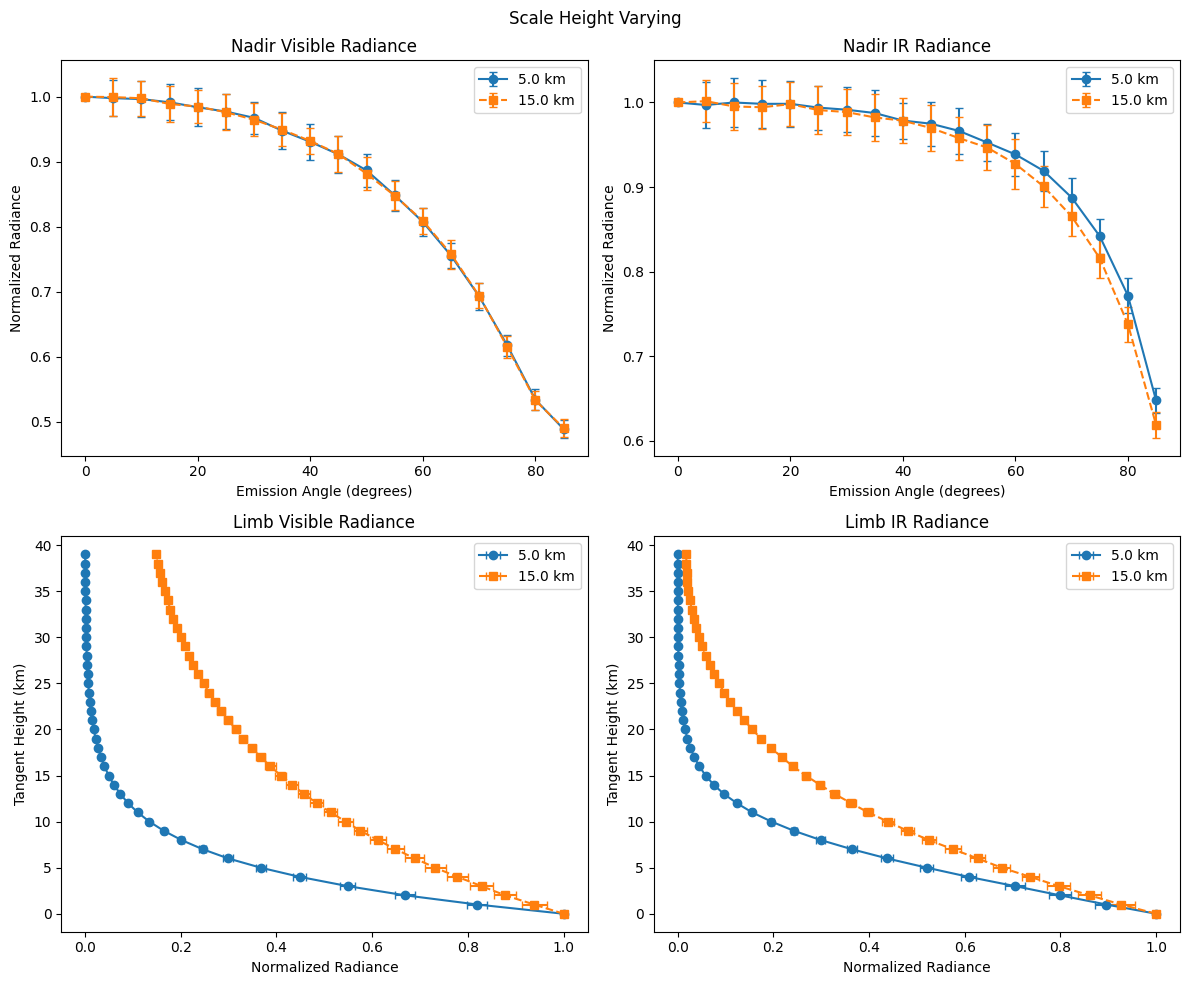

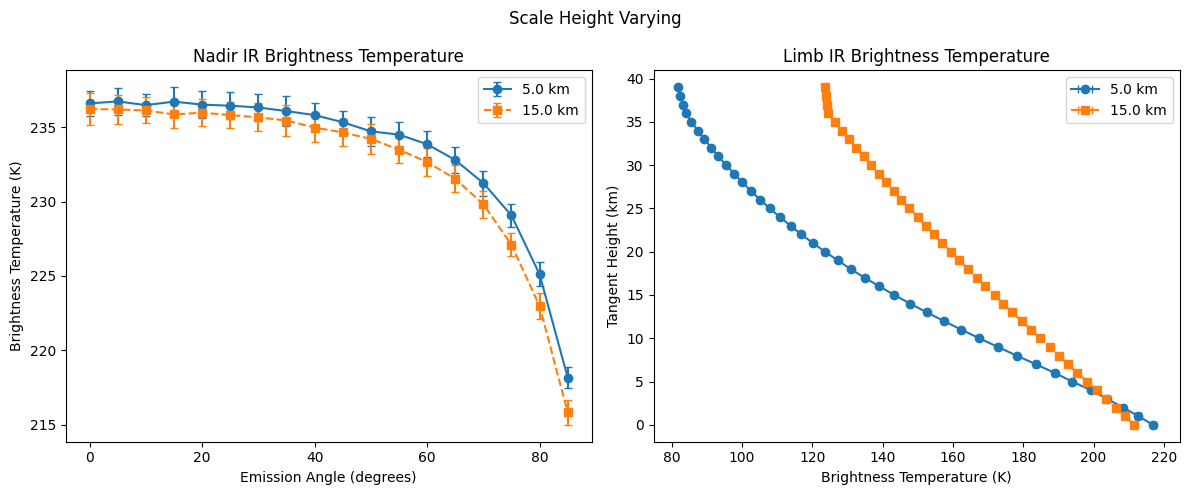

In [4]:
#plotting for scale heights
scale_height_low = 5e3
scale_height_high = 15e3

mars_obs_H_low = msd.MarsSyntheticData(H_dust=scale_height_low)
mars_obs_H_high = msd.MarsSyntheticData(H_dust=scale_height_high)

h_plot1 = msd.plot_comparison(obs1=mars_obs_H_low, obs2=mars_obs_H_high,
                              label1=f"{scale_height_low/1e3} km",
                              label2=f"{scale_height_high/1e3} km",
                              title="Scale Height Varying")

h_plot2 = msd.plot_brightness_temps(obs1=mars_obs_H_low, obs2=mars_obs_H_high,
                              label1=f"{scale_height_low/1e3} km",
                              label2=f"{scale_height_high/1e3} km",
                              title="Scale Height Varying")

c:\Users\miro2306\Documents\ASTR5830\homework3\radiation_fundamentals.py:32: RuntimeWarning: overflow encountered in exp
  return c1 / (wavelength**5 * (np.exp(c2) - 1.0)) / np.pi


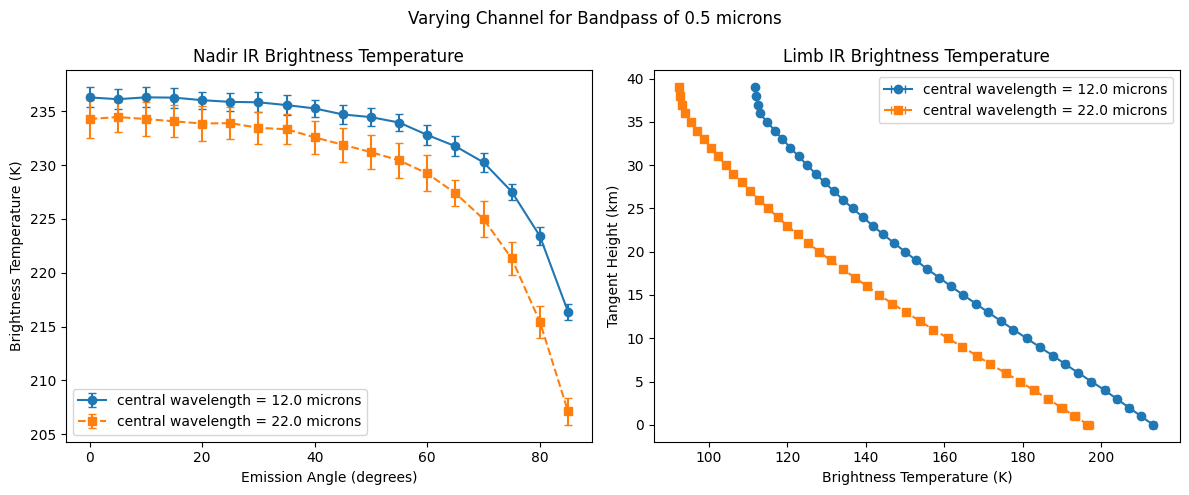

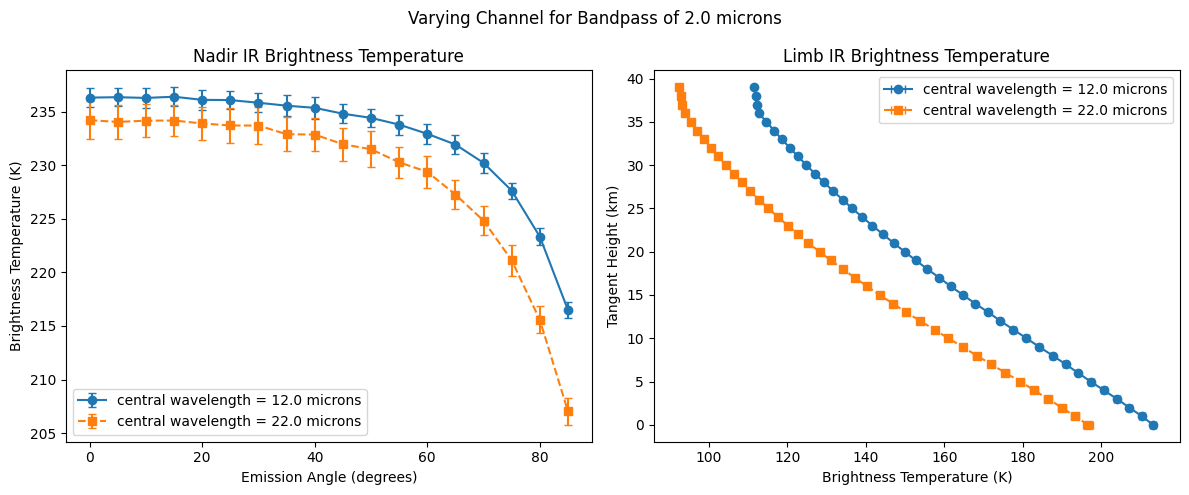

In [6]:
channel_A4 = 12e-6 #m
channel_A5 = 22e-6 #m

narrow_bandpass = 0.5e-6#m
broad_bandpass = 2e-6#m

#first for narrow
mars_obs_a4_narrow = msd.MarsSyntheticData(ir_center=channel_A4, ir_width=narrow_bandpass)
mars_obs_a5_narrow = msd.MarsSyntheticData(ir_center=channel_A5, ir_width=narrow_bandpass)

narrowplot = msd.plot_brightness_temps(mars_obs_a4_narrow, mars_obs_a5_narrow,
                                   label1=f"central wavelength = {channel_A4/1e-6} microns",
                                   label2=f"central wavelength = {channel_A5/1e-6} microns",
                                   title=f"Varying Channel for Bandpass of {narrow_bandpass/1e-6} microns")

#now for broad
mars_obs_a4_broad = msd.MarsSyntheticData(ir_center=channel_A4, ir_width=broad_bandpass)
mars_obs_a5_broad = msd.MarsSyntheticData(ir_center=channel_A5, ir_width=broad_bandpass)

broadplot = msd.plot_brightness_temps(mars_obs_a4_broad, mars_obs_a5_broad,
                                   label1=f"central wavelength = {channel_A4/1e-6} microns",
                                   label2=f"central wavelength = {channel_A5/1e-6} microns",
                                   title=f"Varying Channel for Bandpass of {broad_bandpass/1e-6} microns")


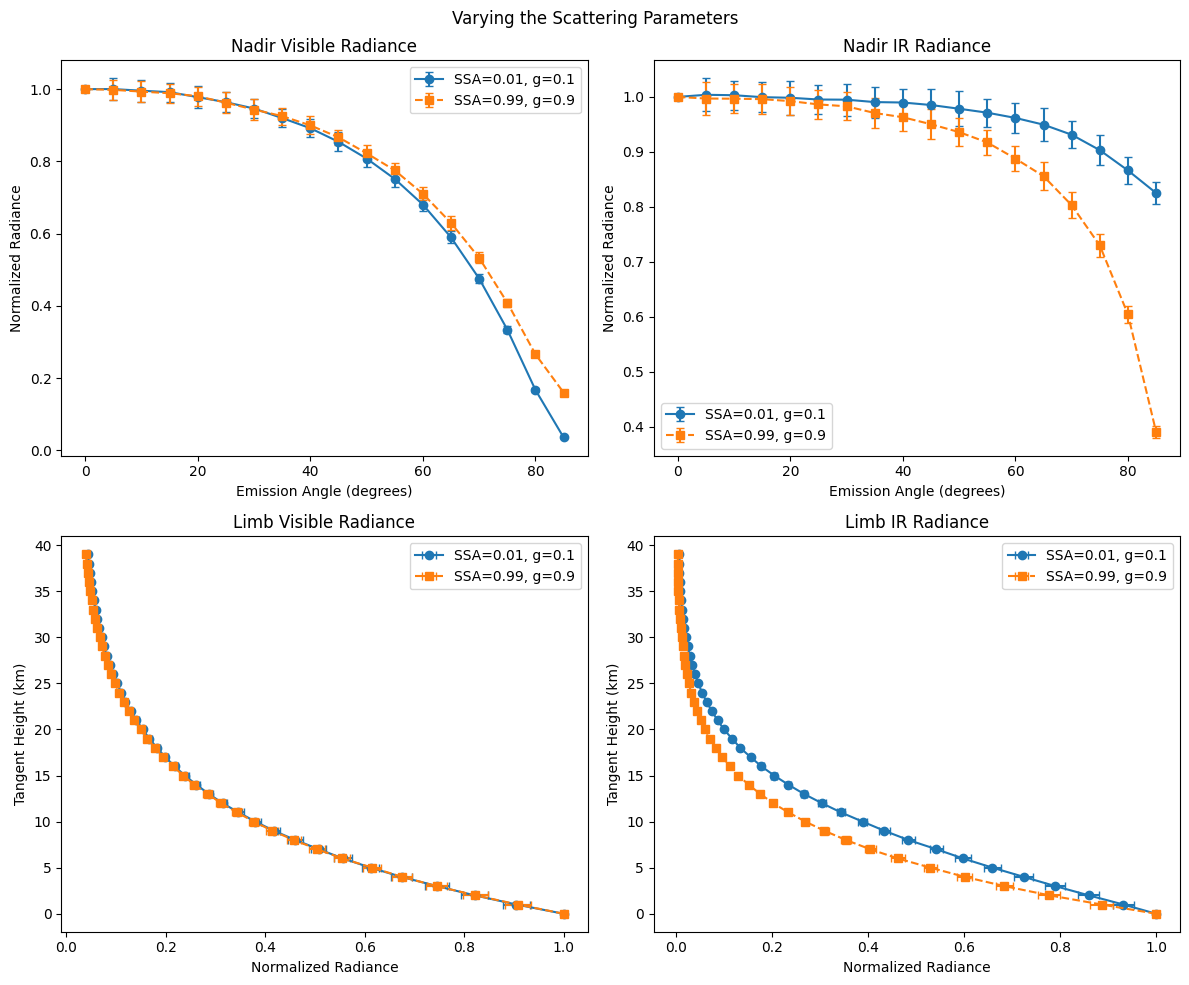

In [7]:
absorbing_ssa = 0.01
absorbing_g = 0.1

scat_ssa = 0.99
scat_g = 0.9

mars_obs_absorbing = msd.MarsSyntheticData(single_scatter_albedo_vis=absorbing_ssa, 
                                           single_scatter_albedo_ir=absorbing_ssa,
                                           asymmetry_parameter_vis=absorbing_g,
                                           asymmetry_parameter_ir=absorbing_g)

mars_obs_scat = msd.MarsSyntheticData(single_scatter_albedo_vis=scat_ssa,
                                      single_scatter_albedo_ir=scat_ssa,
                                      asymmetry_parameter_vis= scat_g,
                                      asymmetry_parameter_ir=scat_g)

comp = msd.plot_comparison(obs1=mars_obs_absorbing,
                           obs2=mars_obs_scat,
                           label1=f"SSA={absorbing_ssa}, g={absorbing_g}",
                           label2=f"SSA={scat_ssa}, g={scat_g}",
                           title="Varying the Scattering Parameters")